<a href="https://colab.research.google.com/github/SarkarPriyanshu/Machine-Learning-Models/blob/main/SellingPrice_of_Product_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [86]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive

from sklearn.model_selection import train_test_split

from matplotlib.legend_handler import HandlerLine2D
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

import warnings
warnings.filterwarnings('ignore')

In [87]:
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [88]:
df = pd.read_csv('/content/gdrive/MyDrive/dataset/train.csv')

In [89]:
df.columns

Index(['Product_id', 'Stall_no', 'instock_date', 'Market_Category',
       'Customer_name', 'Loyalty_customer', 'Product_Category', 'Grade',
       'Demand', 'Discount_avail', 'charges_1', 'charges_2 (%)',
       'Minimum_price', 'Maximum_price', 'Selling_Price'],
      dtype='object')

In [90]:
df.shape

(6368, 15)

In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6368 entries, 0 to 6367
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Product_id        6368 non-null   object 
 1   Stall_no          6363 non-null   float64
 2   instock_date      6368 non-null   object 
 3   Market_Category   6368 non-null   int64  
 4   Customer_name     6157 non-null   object 
 5   Loyalty_customer  6368 non-null   object 
 6   Product_Category  6368 non-null   object 
 7   Grade             6368 non-null   int64  
 8   Demand            6368 non-null   int64  
 9   Discount_avail    6330 non-null   float64
 10  charges_1         6170 non-null   float64
 11  charges_2 (%)     6163 non-null   float64
 12  Minimum_price     6330 non-null   float64
 13  Maximum_price     6025 non-null   float64
 14  Selling_Price     6327 non-null   float64
dtypes: float64(7), int64(3), object(5)
memory usage: 746.4+ KB


In [92]:
np.round(df.isnull().sum() / df.shape[0] * 100,2)

Product_id          0.00
Stall_no            0.08
instock_date        0.00
Market_Category     0.00
Customer_name       3.31
Loyalty_customer    0.00
Product_Category    0.00
Grade               0.00
Demand              0.00
Discount_avail      0.60
charges_1           3.11
charges_2 (%)       3.22
Minimum_price       0.60
Maximum_price       5.39
Selling_Price       0.64
dtype: float64

In [93]:
df.duplicated().sum()

0

In [94]:
df.describe()

,Stall_no,Market_Category,Grade,Demand,Discount_avail,charges_1,charges_2 (%),Minimum_price,Maximum_price,Selling_Price
count,6363.000000,6368.000000,6368.000000,6368.000000,6330.000000,6170.000000,6163.000000,6330.000000,6025.000000,6327.000000
mean,25.309445,199.340609,0.643687,50.921168,0.140442,264.514100,10.146195,3531.349763,6432.545892,4563.242592
std,14.328980,170.275570,1.025092,29.091922,0.347473,124.483056,4.318339,2194.729604,3716.177364,2979.102408
min,1.000000,0.000000,0.000000,1.000000,0.000000,100.000000,1.000000,1.000000,404.000000,-6062.470000
25%,13.000000,55.000000,0.000000,26.000000,0.000000,163.000000,7.000000,1879.250000,3918.000000,2450.005280
50%,25.000000,132.000000,0.000000,51.000000,0.000000,252.000000,10.000000,3157.500000,5634.000000,4210.384640
75%,37.000000,403.000000,2.000000,76.000000,0.000000,314.000000,14.000000,4697.000000,8126.000000,6167.643252
max,50.000000,471.000000,3.000000,100.000000,1.000000,649.000000,17.000000,17580.000000,58812.000000,22638.325941


<AxesSubplot:>

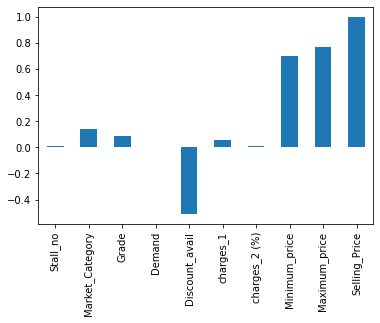

In [95]:
df.corr()['Selling_Price'].plot(kind='bar')

In [96]:
df.sample(5)

,Product_id,Stall_no,instock_date,Market_Category,Customer_name,Loyalty_customer,Product_Category,Grade,Demand,Discount_avail,charges_1,charges_2 (%),Minimum_price,Maximum_price,Selling_Price
186,TOPEDCHAAH2UHQSR,33.0,2015-05-05 16:19:45.000,39,Reese,Yes,Fashion,3,16,0.0,363.0,12.0,2978.0,5626.0,4669.692984
3690,PBXEC87EUW5GHDJY,5.0,2015-12-06 06:53:18.000,93,Isac,No,Fashion,2,3,0.0,362.0,12.0,1552.0,4386.0,3334.226544
343,SHIE6G82KNDJUCAQ,27.0,2015-08-15 20:08:07.000,76,Kathleen,Yes,Cosmetics,0,85,0.0,236.0,16.0,4039.0,5304.0,4844.194432
5807,PBXE5CFUQCWNW8HM,36.0,2016-01-04 08:04:18.000,308,Erianna,Yes,Repair,0,31,0.0,273.0,6.0,1312.0,6942.0,4391.473800
3202,RNGE88QAP8FMFVWU,11.0,2015-05-07 16:20:59.000,220,Leia,Yes,Repair,0,47,0.0,211.0,2.0,3246.0,4488.0,4052.665872


# Without any analytics and proprocessing

### Linear Regressor Model

In [97]:
df['Product_Category'] = df['Product_Category'].map({value:index for index,value in  enumerate(list(df['Product_Category'].value_counts().to_dict().keys()))}) 

In [98]:
df['Loyalty_customer'] = df['Loyalty_customer'].map({'Yes':1,'No':0})

In [99]:
df = df.dropna()

In [100]:
df.shape

(3274, 15)

In [101]:
df =  df.drop(['Product_id','instock_date','Customer_name'],axis=1)

In [102]:
df.sample(5)

,Stall_no,Market_Category,Loyalty_customer,Product_Category,Grade,Demand,Discount_avail,charges_1,charges_2 (%),Minimum_price,Maximum_price,Selling_Price
2271,24.0,57,1.0,8,0,33,0.0,140.0,5.0,3928.0,7667.0,5925.549000
5438,20.0,10,1.0,7,3,57,0.0,269.0,16.0,856.0,1639.0,1508.781600
1559,36.0,204,1.0,7,0,11,1.0,278.0,14.0,3069.0,5049.0,651.336860
3709,34.0,446,1.0,2,0,33,0.0,266.0,12.0,4612.0,6979.0,6053.278875
1080,7.0,93,1.0,1,1,96,0.0,251.0,7.0,1977.0,5687.0,4026.846208


In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3274 entries, 0 to 6367
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Stall_no          3274 non-null   float64
 1   Market_Category   3274 non-null   int64  
 2   Loyalty_customer  3274 non-null   float64
 3   Product_Category  3274 non-null   int64  
 4   Grade             3274 non-null   int64  
 5   Demand            3274 non-null   int64  
 6   Discount_avail    3274 non-null   float64
 7   charges_1         3274 non-null   float64
 8   charges_2 (%)     3274 non-null   float64
 9   Minimum_price     3274 non-null   float64
 10  Maximum_price     3274 non-null   float64
 11  Selling_Price     3274 non-null   float64
dtypes: float64(8), int64(4)
memory usage: 332.5 KB


In [104]:
df.isnull().sum()

Stall_no            0
Market_Category     0
Loyalty_customer    0
Product_Category    0
Grade               0
Demand              0
Discount_avail      0
charges_1           0
charges_2 (%)       0
Minimum_price       0
Maximum_price       0
Selling_Price       0
dtype: int64

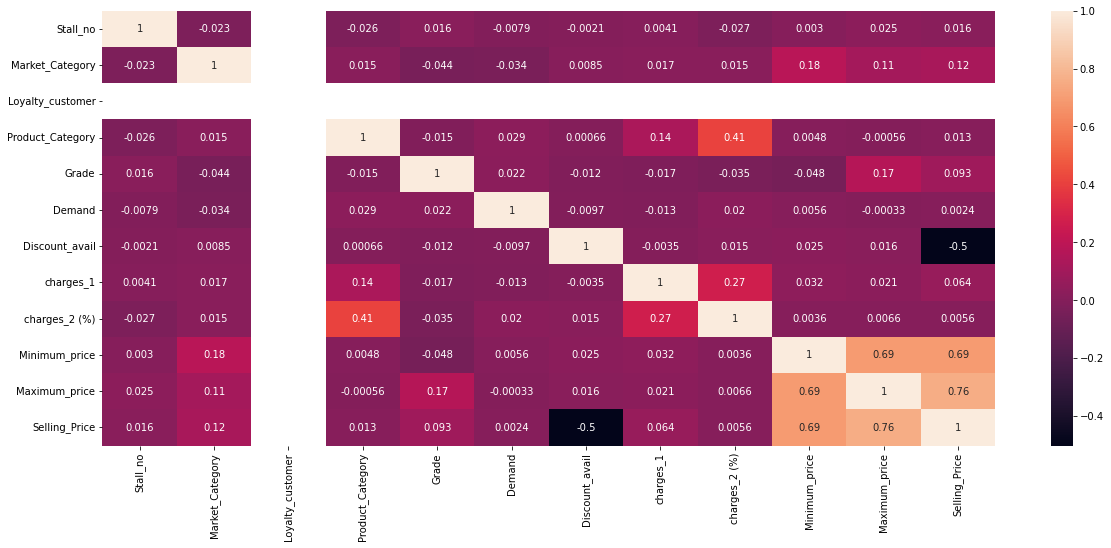

In [105]:
# Another Technique


fig, ax = plt.subplots(figsize=(20, 8))
 
# drawing the plot
sns.heatmap(df.corr(),annot=True,ax=ax)
plt.show()

In [106]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('Selling_Price',axis=1), df['Selling_Price'], test_size=0.30, random_state=42)

In [107]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2291, 11), (983, 11), (2291,), (983,))

In [108]:
reg = LinearRegression()

In [109]:
reg = reg.fit(X_train,y_train)

In [110]:
test_pred = reg.predict(X_test)

In [111]:
train_pred = reg.predict(X_train)

In [112]:
f'mean_absolute_error: {mean_absolute_error(y_train,train_pred)},mean_squared_error: {np.sqrt(mean_squared_error(y_train,train_pred))},r2_score: {r2_score(y_train,train_pred)}'

'mean_absolute_error: 512.7568165863498,mean_squared_error: 1030.199142636487,r2_score: 0.8945432980346371'

In [113]:
f'mean_absolute_error: {mean_absolute_error(y_test,test_pred)},mean_squared_error :{np.sqrt(mean_squared_error(y_test,test_pred))},r2_score {r2_score(y_test,test_pred)}'

'mean_absolute_error: 535.5485915341952,mean_squared_error :999.8969472108503,r2_score 0.9069483202066353'

In [114]:
residual = y_test - test_pred

### 3. Normality of Residual

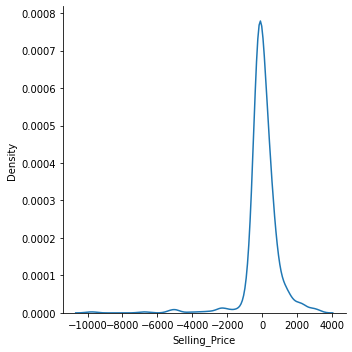

In [115]:
sns.displot(residual,kind='kde')

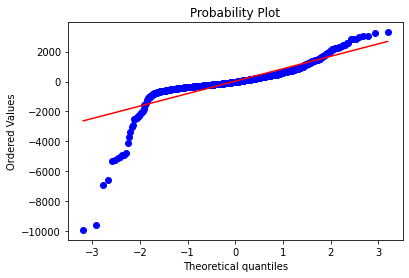

In [116]:
# QQ Plot

import scipy as sp

fig, ax = plt.subplots(figsize=(6,4))
sp.stats.probplot(residual, plot=ax, fit=True)

plt.show()

### 4. Homoscedasticity

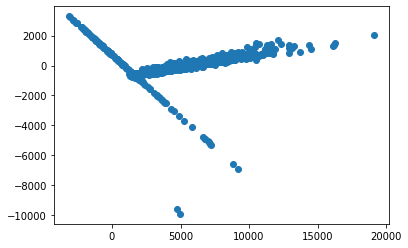

In [117]:
plt.scatter(test_pred,residual)

### 5. Autocorrelation of Residuals

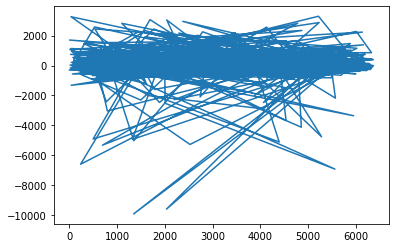

In [118]:
plt.plot(residual)

### Ridge Regressor Model

In [148]:
mean_absolute_error_train_list = list()
mean_absolute_error_test_list = list()
mean_squared_error_train_list = list()
mean_squared_error_test_list = list()
r2_score_train_list = list()
r2_score_test_list = list()
range = np.linspace(0,1000)
coefs = list()

for i in range:
  clf = Ridge(alpha=i)
  clf = clf.fit(X_train,y_train)
  test_pred = clf.predict(X_test)
  train_pred = clf.predict(X_train)


  coefs.append(reg.coef_.tolist())
  mean_absolute_error_train_list.append(mean_absolute_error(y_train,train_pred))
  mean_squared_error_train_list.append(np.sqrt(mean_squared_error(y_train,train_pred)))
  r2_score_train_list.append(r2_score(y_train,train_pred))

  mean_absolute_error_test_list.append(mean_absolute_error(y_test,test_pred))
  mean_squared_error_test_list.append(np.sqrt(mean_squared_error(y_test,test_pred)))
  r2_score_test_list.append(r2_score(y_test,test_pred))

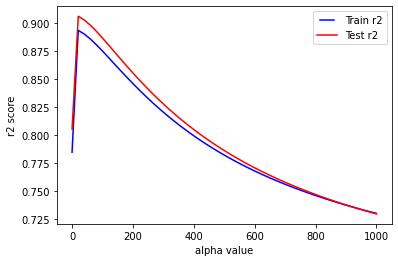

In [149]:
line1, = plt.plot(range, r2_score_train_list, 'b', label='Train r2')
line2, = plt.plot(range, r2_score_test_list, 'r', label='Test r2')

plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
 
plt.ylabel('r2 score')
plt.xlabel('alpha value')
plt.show() 

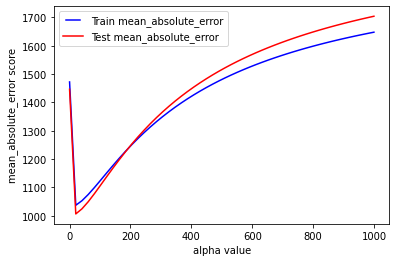

In [150]:
line1, = plt.plot(range, mean_squared_error_train_list, 'b', label='Train mean_absolute_error')
line2, = plt.plot(range, mean_squared_error_test_list, 'r', label='Test mean_absolute_error')

plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
 
plt.ylabel('mean_absolute_error score')
plt.xlabel('alpha value')
plt.show() 

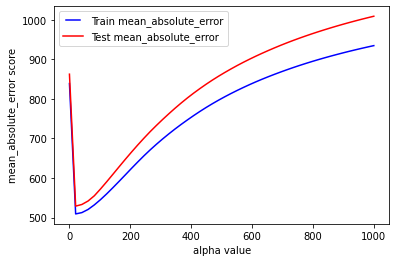

In [151]:
line1, = plt.plot(range, mean_absolute_error_train_list, 'b', label='Train mean_absolute_error')
line2, = plt.plot(range, mean_absolute_error_test_list, 'r', label='Test mean_absolute_error')

plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
 
plt.ylabel('mean_absolute_error score')
plt.xlabel('alpha value')
plt.show() 

In [128]:
len(coefs)

100

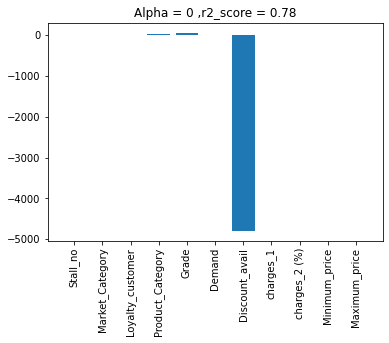

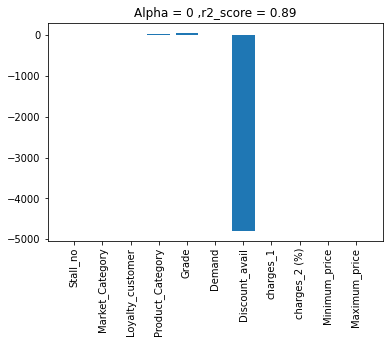

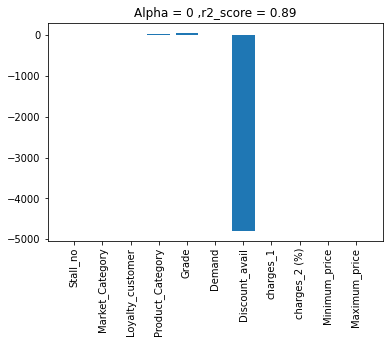

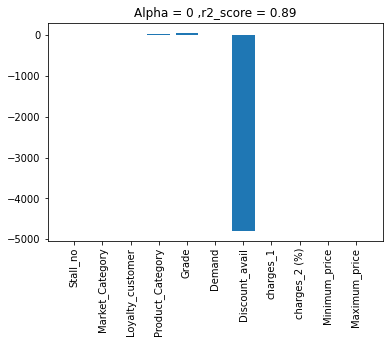

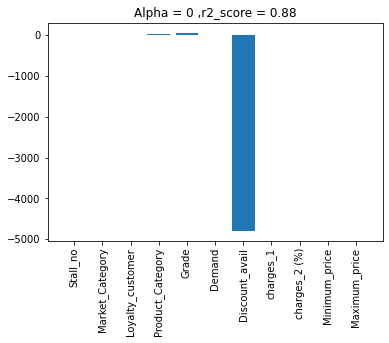

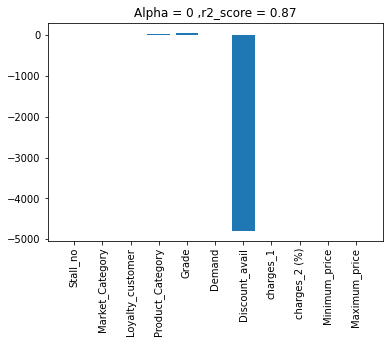

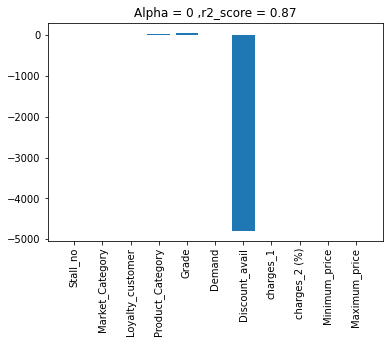

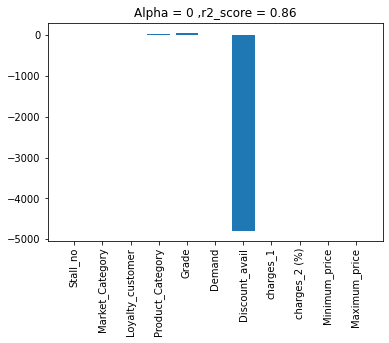

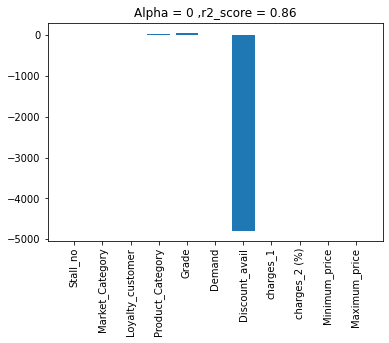

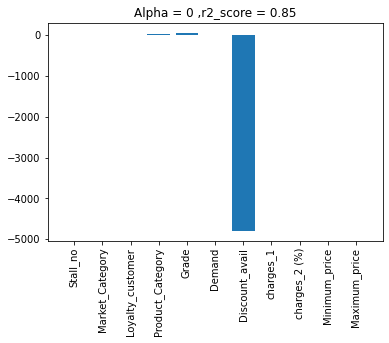

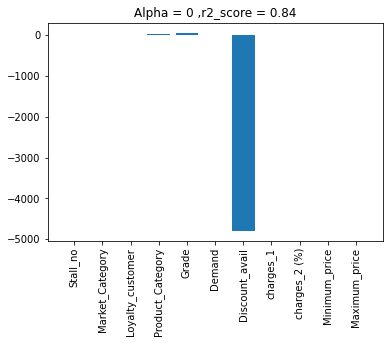

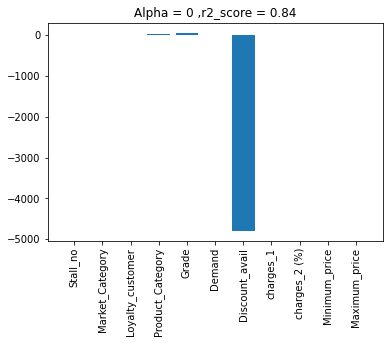

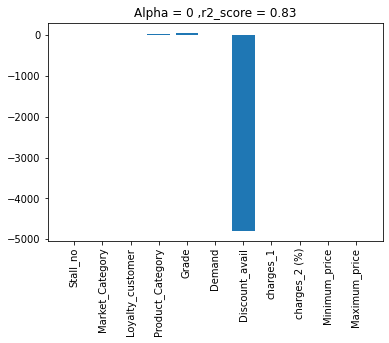

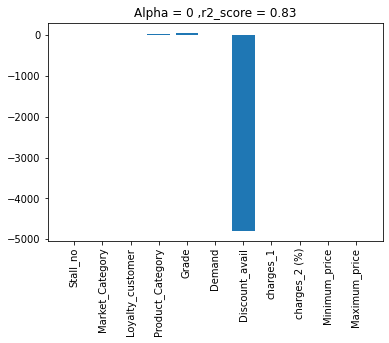

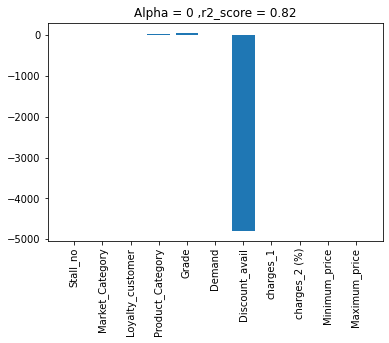

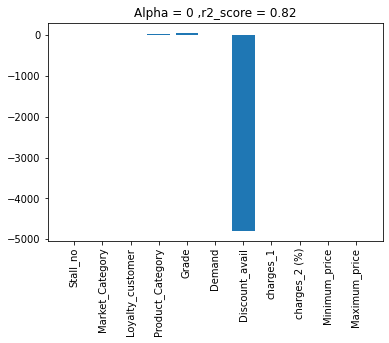

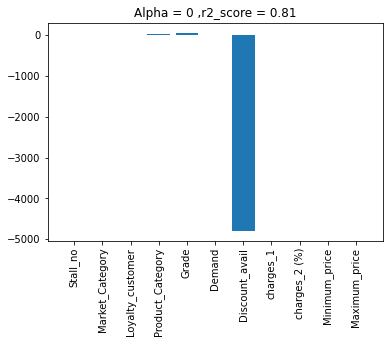

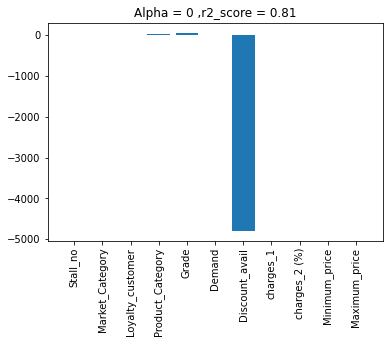

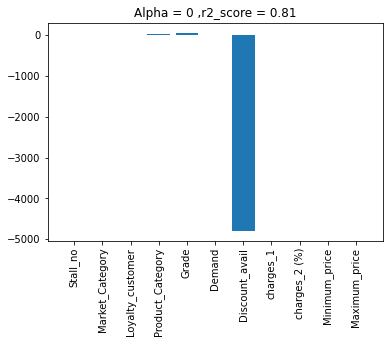

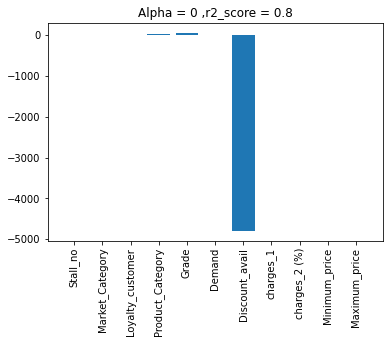

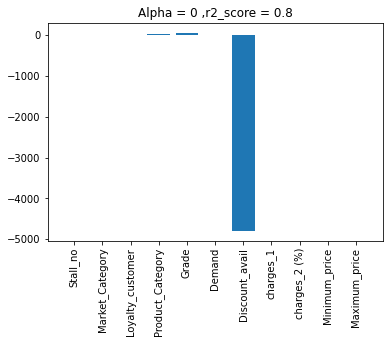

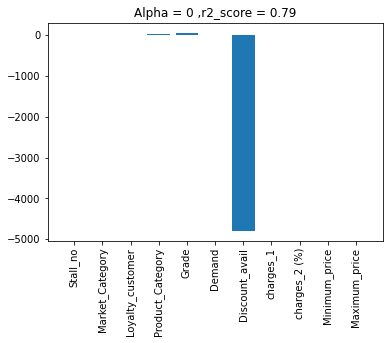

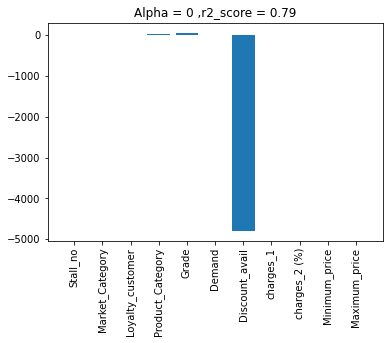

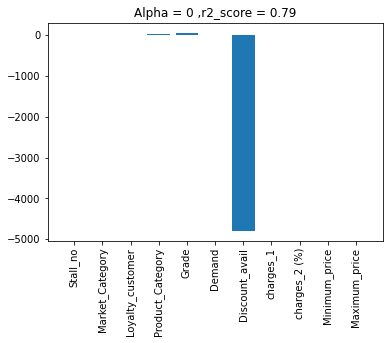

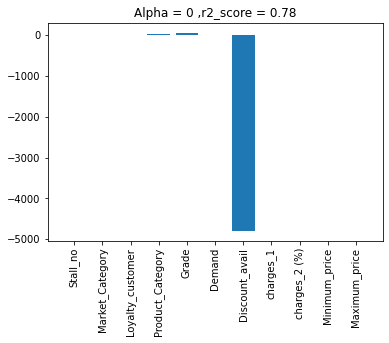

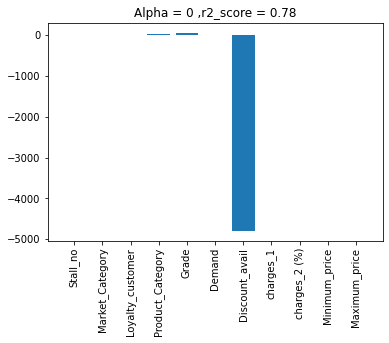

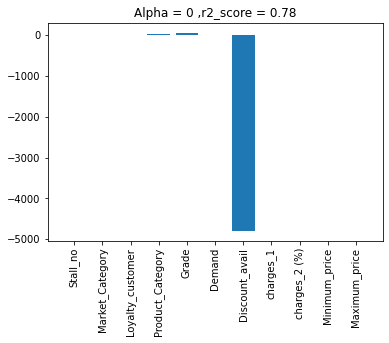

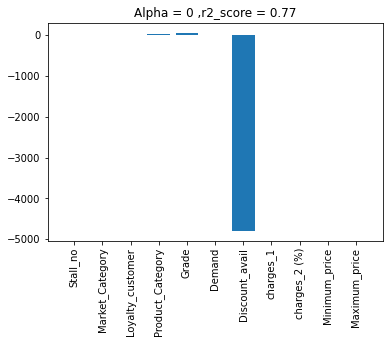

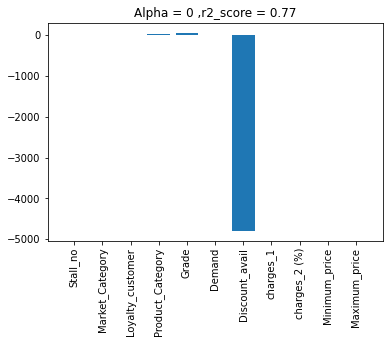

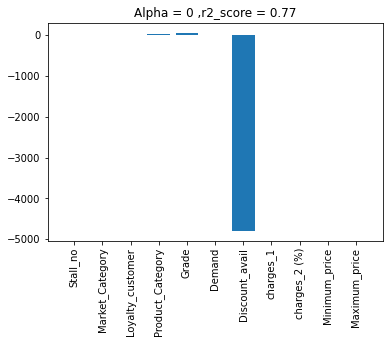

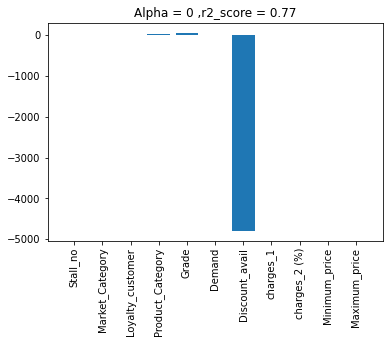

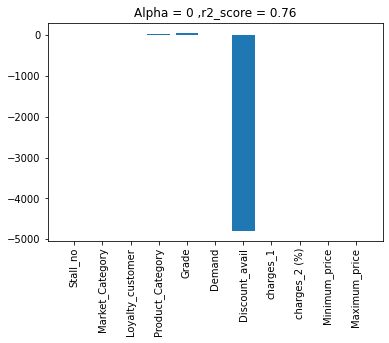

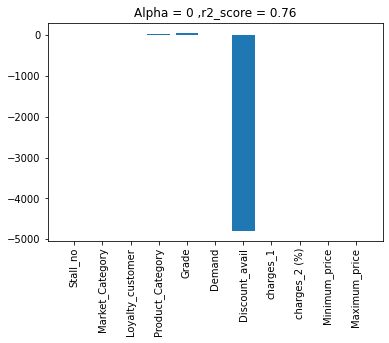

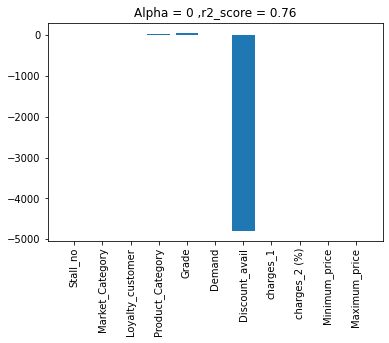

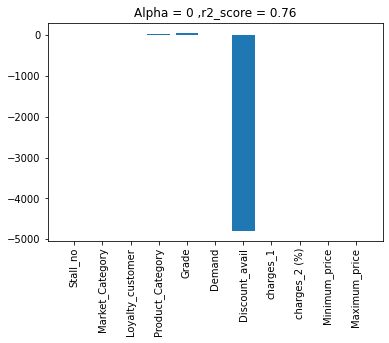

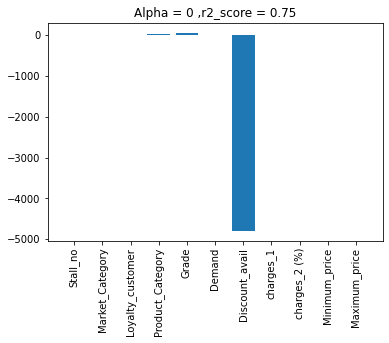

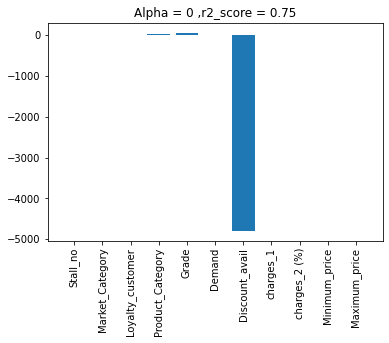

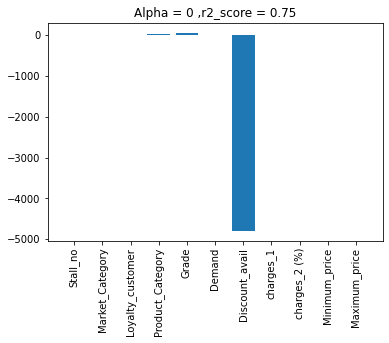

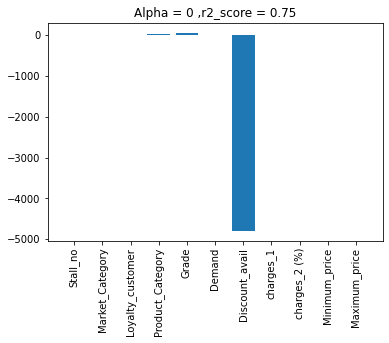

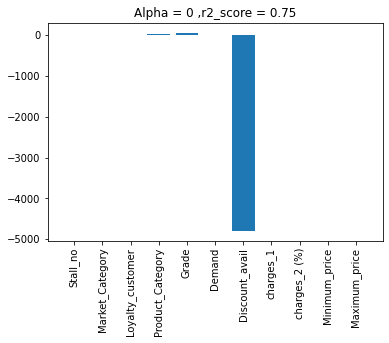

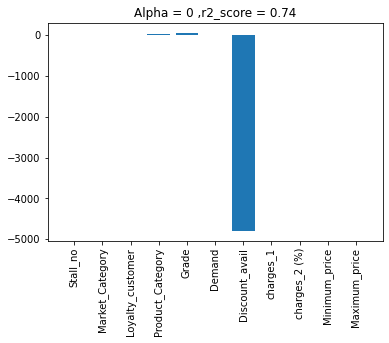

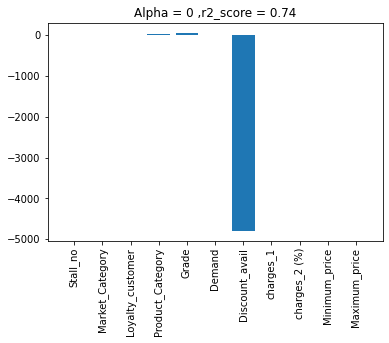

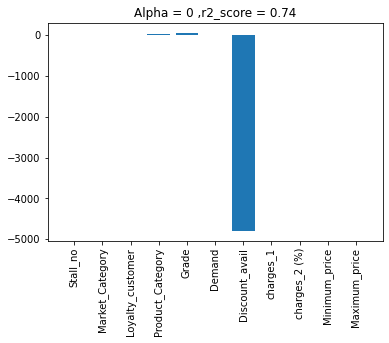

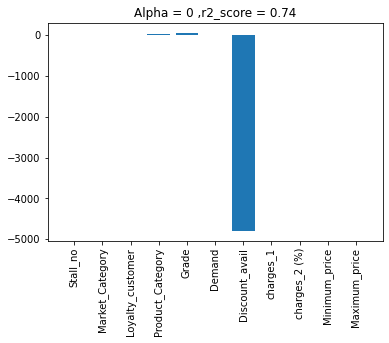

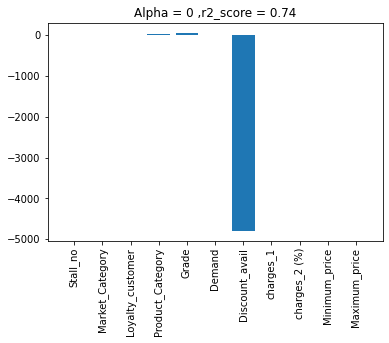

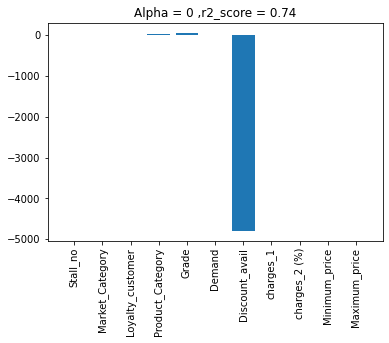

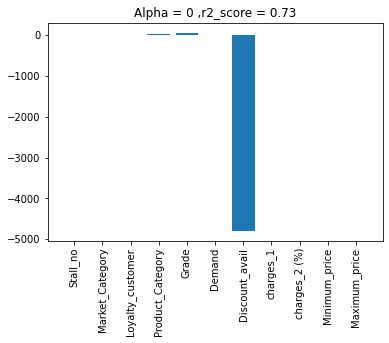

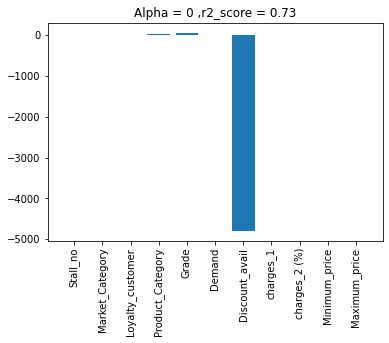

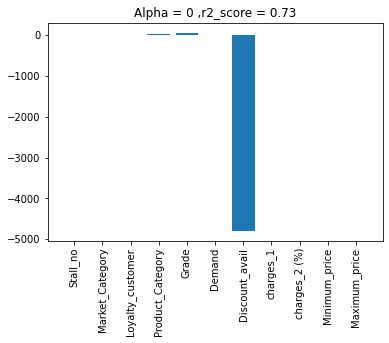

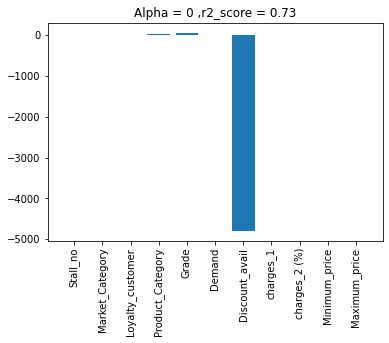

In [152]:
for i,value in enumerate(coefs):
  plt.bar(X_train.columns,value)
  plt.title('Alpha = 0 ,r2_score = {}'.format(round(r2_score_train_list[i],2)))
  plt.xticks(rotation = 90)
  plt.show()

In [153]:
max(r2_score_test_list),max(r2_score_train_list)

(0.9057774763284859, 0.8931935566639759)

## Analysis

In [ ]:
numeric_features = [feature for feature in df.columns if df[feature].dtype == 'int64' or df[feature].dtype == 'float64']

In [ ]:
for feature in numeric_features:
  print(f'mean_{feature} : {df[feature].mean()}, median_{feature} : {df[feature].median()}, min_{feature} : {df[feature].min()}, max_{feature} : {df[feature].max()}, variance_{feature} : {df[feature].var()}')
  print()

In [ ]:
for feature in numeric_features:
    fig, ax = plt.subplots(1,3, figsize=(20,4))
    
    sns.distplot(df[feature],ax=ax[0]).set(title=f'{feature} distribution')
    
    sns.boxplot(df[feature],ax=ax[1]).set(title=f'{feature} boxplot')
    
    stats.probplot(df[feature], dist="norm", plot=plt)
    plt.show()

In [ ]:
for feature in numeric_features:
  if feature == 'Selling_Price':
    pass
  else:
    print(f'{feature} vs Selling_Price')
    sns.scatterplot(df[feature],df['Selling_Price'])
    plt.show()  